## Importing data

In [5]:
# general
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
#!pwd to check the working directory
raw_df = pd.read_csv('listings_summary.csv')
print(f"The dataset contains {len(raw_df)} Airbnb listings")
print(f"The dataset contains {len(raw_df.columns)} columns")
pd.set_option('display.max_columns', len(raw_df.columns)) # To view all columns
raw_df['access'].head()

The dataset contains 22552 Airbnb listings
The dataset contains 96 columns


0    Simple kitchen/cooking, refrigerator, microwav...
1    Außer deinem Zimmer kannst du noch die Küche u...
2    The apartment will be entirely yours. We are c...
3    I do have a strictly non-smoker-flat.  Keep th...
4    The guests have access to the bathroom, a smal...
Name: access, dtype: object

# Adding length of certain variables - Philipp

We will add some numerical variables indicating the length of a listings summary and description as we think these may indicate a host takes better care and wants to market a listing better so this may have an influence on the price. 

In [7]:
raw_df['summary_length'] = raw_df['summary'].str.len().fillna(0)
raw_df['description_length'] = raw_df['description'].str.len().fillna(0)
raw_df['neighborhood_overview_length'] = raw_df['neighborhood_overview'].str.len().fillna(0)

#raw_df['space_length'] = raw_df['space'].str.len().fillna(0)
    #describes size of apartment -> maybe extracting number may be useful

#raw_df['notes_length'] = raw_df['notes'].str.len().fillna(0)
    #notes describes the amenities -> already have this
    
#raw_df['transit_length'] = raw_df['transit'].str.len().fillna(0)
    #describes the access routes to the listing (may be valuable but not length of string instead the options)
    
#raw_df['access_length'] = raw_df['access'].str.len().fillna(0)
    #access describes the amenities -> already have this
    
#raw_df['interaction_length'] = raw_df['interaction'].str.len().fillna(0)
    #Don't see the relevane of the length of the string
    
#raw_df['house_rules_length'] = raw_df['house_rules'].str.len().fillna(0)
    #Again maybe contains important info -> certain rules may make people averse to taking the listing (but not length)
    
#raw_df['host_about_length'] = raw_df['host_about'].str.len().fillna(0)
    #just a description of the host about themselves (don't see the relevance)
    
raw_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,...,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,summary_length,description_length,neighborhood_overview_length
0,2015,https://www.airbnb.com/rooms/2015,20181107122246,2018-11-07,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,none,It is located in the former East Berlin area o...,"This is my home, not a hotel. I rent out occas...","Close to U-Bahn U8 and U2 (metro), Trams M12, ...","Simple kitchen/cooking, refrigerator, microwav...",Always available,"No parties No events No pets No smoking, not e...",NaN,NaN,https://a0.muscache.com/im/pictures/260fd609-7...,NaN,2217,https://www.airbnb.com/users/show/2217,Ian,2008-08-18,"Key Biscayne, Florida, United States",Believe in sharing economy.,within an hour,96%,NaN,t,https://a0.muscache.com/im/pictures/21428a22-4...,https://a0.muscache.com/im/pictures/21428a22-4...,Mitte,4.0,4.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Berlin, Berlin, Germany",Mitte,Brunnenstr. Süd,Mitte,Berlin,Berlin,10119,Berlin,"Berlin, Germany",DE,Germany,...,Guesthouse,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",NaN,$60.00,NaN,NaN,$200.00,$30.00,1,$28.00,4,1125,3 months ago,t,0,21,51,141,2018-11-07,118,2016-04-11,2018-10-28,93.0,10.0,9.0,10.0,10.0,10.0,9.0,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,4,3.76,414.0,1000.0,423.0
1,2695,https://www.airbnb.com/rooms/2695,20181107122246,2018-11-07,Prenzlauer Berg close to Mauerpark,NaN,In the summertime we are spending most of our ...,In the summertime we are spending most of our ...,none,NaN,NaN,Within walking distance you'll find the S-Bahn...,Außer deinem Zimmer kannst du noch die Küche u...,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/97d4f6e8-1...,NaN,2986,https://www.airbnb.com/users/show/2986,Michael,2008-09-16,"Berlin, Berlin, Germany",Living with my wife in Berlin. Like travellin...,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/50434955-1...,https://a0.muscache.com/im/pictures/50434955-1...,Prenzlauer Berg,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Berlin, Berlin, Germany",NaN,Prenzlauer Berg Nordwest,Pankow,Berlin,Berlin,10437,Berlin,"Berlin, Germany",DE,Germany,...,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",NaN,$17.00,NaN,NaN,$0.00,$0.00,1,$0.00,2,40,7 weeks ago,t,0,0,0,0,2018-11-07,6,2018-07-04,2018-10-01,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t,NaN,NaN,f,f,flexible,f,f,1,1.42,0.0,1000.0,0.0
2,3176,https://www.airbnb.com/room

In [8]:
# Create a column with the number of different types of verifications
raw_df['host_verifications_count'] = raw_df['host_verifications'].str.count(',')
raw_df['FB_verification'] = raw_df['host_verifications'].str.count('facebook')
raw_df['email_verification'] = raw_df['host_verifications'].str.count('email')
raw_df['ID_verification'] = raw_df['host_verifications'].str.count('government')
raw_df['phone_verification'] = raw_df['host_verifications'].str.count('phone')
raw_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,...,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,summary_length,description_length,neighborhood_overview_length,host_verifications_count,FB_verification,email_verification,ID_verification,phone_verification
0,2015,https://www.airbnb.com/rooms/2015,20181107122246,2018-11-07,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,none,It is located in the former East Berlin area o...,"This is my home, not a hotel. I rent out occas...","Close to U-Bahn U8 and U2 (metro), Trams M12, ...","Simple kitchen/cooking, refrigerator, microwav...",Always available,"No parties No events No pets No smoking, not e...",NaN,NaN,https://a0.muscache.com/im/pictures/260fd609-7...,NaN,2217,https://www.airbnb.com/users/show/2217,Ian,2008-08-18,"Key Biscayne, Florida, United States",Believe in sharing economy.,within an hour,96%,NaN,t,https://a0.muscache.com/im/pictures/21428a22-4...,https://a0.muscache.com/im/pictures/21428a22-4...,Mitte,4.0,4.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Berlin, Berlin, Germany",Mitte,Brunnenstr. Süd,Mitte,Berlin,Berlin,10119,Berlin,"Berlin, Germany",DE,Germany,...,2.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",NaN,$60.00,NaN,NaN,$200.00,$30.00,1,$28.00,4,1125,3 months ago,t,0,21,51,141,2018-11-07,118,2016-04-11,2018-10-28,93.0,10.0,9.0,10.0,10.0,10.0,9.0,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,4,3.76,414.0,1000.0,423.0,5,0,1,2,1
1,2695,https://www.airbnb.com/rooms/2695,20181107122246,2018-11-07,Prenzlauer Berg close to Mauerpark,NaN,In the summertime we are spending most of our ...,In the summertime we are spending most of our ...,none,NaN,NaN,Within walking distance you'll find the S-Bahn...,Außer deinem Zimmer kannst du noch die Küche u...,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/97d4f6e8-1...,NaN,2986,https://www.airbnb.com/users/show/2986,Michael,2008-09-16,"Berlin, Berlin, Germany",Living with my wife in Berlin. Like travellin...,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/50434955-1...,https://a0.muscache.com/im/pictures/50434955-1...,Prenzlauer Berg,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Berlin, Berlin, Germany",NaN,Prenzlauer Berg Nordwest,Pankow,Berlin,Berlin,10437,Berlin,"Berlin, Germany",DE,Germany,...,1.0,Real Bed,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",NaN,$17.00,NaN,NaN,$0.00,$0.00,1,$0.00,2,40,7 weeks ago,t,0,0,0,0,2018-11-07,6,2018-07-04,2018-10-01,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t,NaN,NaN,f,f,flexible,f,f,1,1.42,0.0,1000.0,0.0,4,0,1,1,1
2,3176,https://www.airbnb.com/rooms/3176,2018

## Dropping unnecessary columns

These columns contain information that is not useful in our analysis

In [9]:
#These columns only contain strings -> would be useful for NLP but since we are not doing it
cols_to_drop = ['listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 
                'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 
                'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 
                'host_name', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 
                'host_neighbourhood', 'host_verifications', 'calendar_last_scraped']
df = raw_df.drop(cols_to_drop, axis=1)
df.head()

,id,experiences_offered,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,summary_length,description_length,neighborhood_overview_length,host_verifications_count,FB_verification,email_verification,ID_verification,phone_verification
0,2015,none,2008-08-18,within an hour,96%,NaN,t,4.0,4.0,t,t,"Berlin, Berlin, Germany",Mitte,Brunnenstr. Süd,Mitte,Berlin,Berlin,10119,Berlin,"Berlin, Germany",DE,Germany,52.534537,13.402557,f,Guesthouse,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",NaN,$60.00,NaN,NaN,$200.00,$30.00,1,$28.00,4,1125,3 months ago,t,0,21,51,141,118,2016-04-11,2018-10-28,93.0,10.0,9.0,10.0,10.0,10.0,9.0,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,4,3.76,414.0,1000.0,423.0,5,0,1,2,1
1,2695,none,2008-09-16,NaN,NaN,NaN,f,1.0,1.0,t,t,"Berlin, Berlin, Germany",NaN,Prenzlauer Berg Nordwest,Pankow,Berlin,Berlin,10437,Berlin,"Berlin, Germany",DE,Germany,52.548513,13.404553,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",NaN,$17.00,NaN,NaN,$0.00,$0.00,1,$0.00,2,40,7 weeks ago,t,0,0,0,0,6,2018-07-04,2018-10-01,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t,NaN,NaN,f,f,flexible,f,f,1,1.42,0.0,1000.0,0.0,4,0,1,1,1
2,3176,none,2008-10-19,within a day,100%,NaN,f,1.0,1.0,t,t,"Berlin, Berlin, Germany",Prenzlauer Berg,Prenzlauer Berg Südwest,Pankow,Berlin,Berlin,10405,Berlin,"Berlin, Germany",DE,Germany,52.534996,13.417579,t,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"{Internet,Wifi,Kitchen,""Buzzer/wireless interc...",720.0,$90.00,$520.00,"$1,900.00",$200.00,$50.00,2,$20.00,62,1125,a week ago,t,0,0,0,220,143,2009-06-20,2017-03-20,92.0,9.0,9.0,9.0,9.0,10.0,9.0,t,NaN,NaN,t,f,strict_14_with_grace_period,f,f,1,1.25,217.0,1000.0,476.0,6,1,1,1,1
3,3309,none,2008-11-07,NaN,NaN,NaN,f,1.0,1.0,t,t,"Berlin, Berlin, Germany",Schöneberg,Schöneberg-Nord,Tempelhof - Schöneberg,Berlin,Berlin,10777,Berlin,"Berlin, Germany",DE,Germany,52.498855,13.349065,t,Apartment,Private room,2,1.0,1.0,1.0,Pull-out Sofa,"{Internet,Wifi,""Pets allowed"",""Pets live on th...",0.0,$26.00,$175.00,$599.00,$250.00,$30.00,1,$18.00,5,360,4 weeks ago,t,0,0,22,297,25,2013-08-12,2018-08-16,88.0,9.0,9.0,9.0,10.0,9.0,9.0,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,0.39,433.0,1000.0,315.0,5,0,2,1,1
4,7071,none,2009-05-16,within an hour,100%,NaN,t,1.0,1.0,t,t,"Berlin, Berlin, Germany",Prenzlauer Berg,Helmholtzplatz,Pankow,Berlin,Berlin,10437,Berlin,"Berlin, Germany",DE,Germany,52.543157,13.415091,t,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,"{Wifi,Heating,""Family/kid friendly"",Essentials...",NaN,$42.00,NaN,NaN,$0.00,$0.00,1,$24.00,2,10,3 days ago,t,15,26,26,26,197,2009-08-18,2018-11-04,96.0,10.0,10.0,10.0,10.0,10.0,9.0,t,NaN,NaN,f,f,moderate,f,f,1,1.75,62.0,1000.0,411.0,4,0,1,1,1


## First look at data -> null values

In [10]:
df['square_feet'].isna().sum()

22106

## Dropping variables

In [11]:
# Dropping variables which have too many null values (more than 14,000)
df.drop(['host_acceptance_rate','square_feet','weekly_price','monthly_price','license','jurisdiction_names'],
        axis=1, inplace = True)
df.set_index('id', inplace=True)

In [8]:
df.loc[((df.host_listings_count == df.host_total_listings_count) == False)][:5]
print(sum((df.host_listings_count == df.host_total_listings_count) == False))

26


In [12]:
##Therefore there are 26 rows where host_listings_count and host_total_listings_count are different and those are
##Nan values thus we can drop one of the columns
df.drop(['host_total_listings_count'], axis=1, inplace=True)

In [13]:
#Variables street, neighbourhood, city, state, zipcode, market, smart_location, country_code, lattitude, longitude,
#is_location_exact and country can be dropped since that have no added value

df.drop(['zipcode', 'latitude', 'longitude', 'street', 'neighbourhood', 'city', 
             'state', 'market', 'smart_location', 'country_code', 'country', 'is_location_exact'], 
             axis=1, inplace=True)

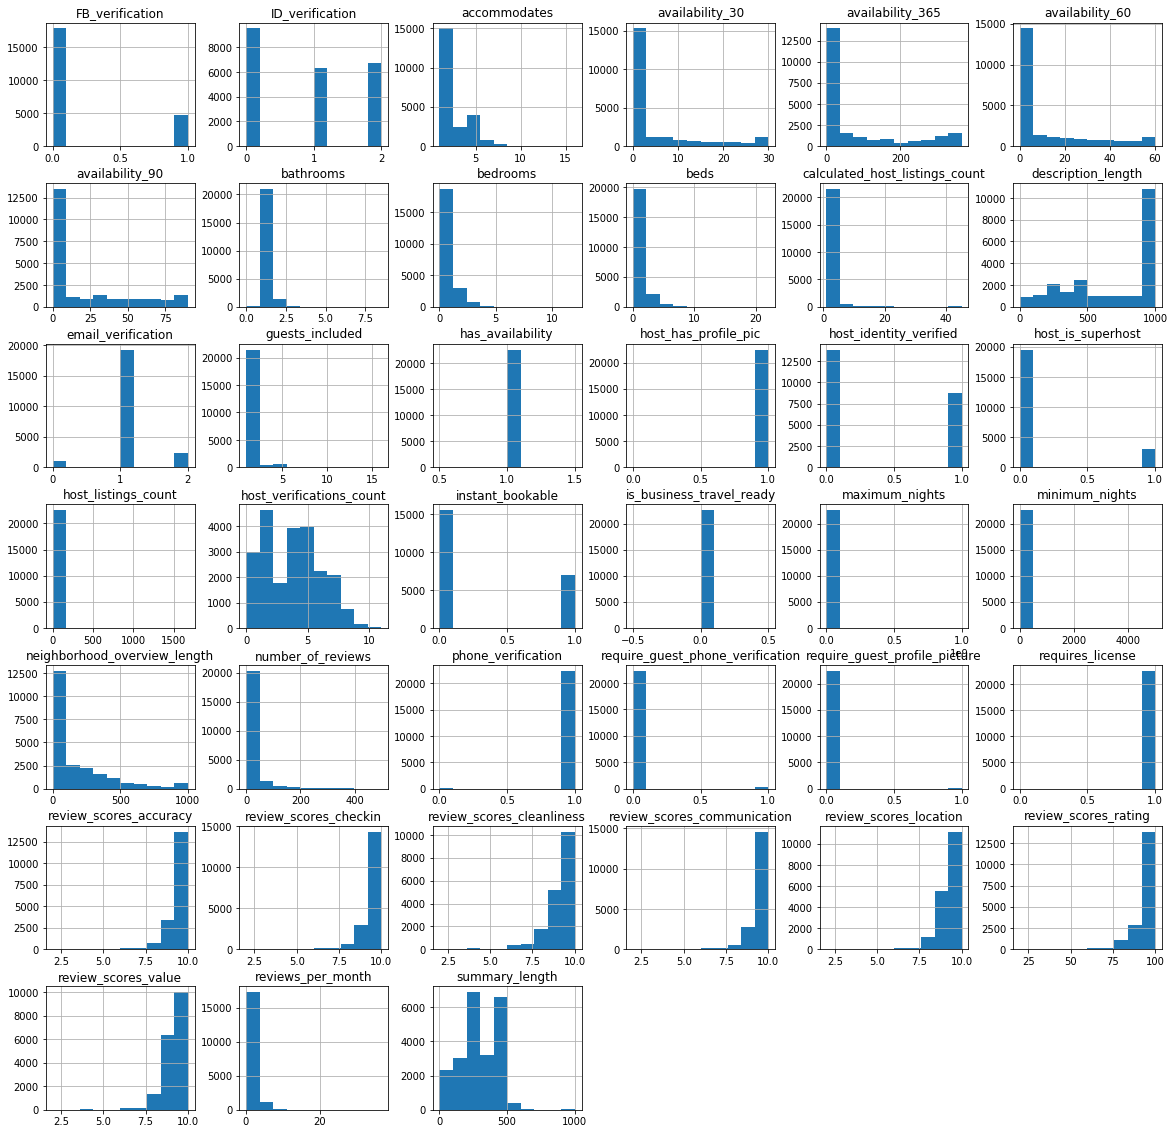

In [14]:
#Some columns have boolean characters 'f' and 't' -> these need to replaced by numerical values
df.replace({'f': 0, 't': 1}, inplace=True)

#Now plot distribution of numerical and boolean columns to see if features contain sufficient numbers so that
#they can be included in our analysis
df.hist(figsize=(20,20));

In [15]:
#As can be seen above there are numerous columns which are majorly imbalanced therefore we remove these
df.drop(['has_availability','host_has_profile_pic','is_business_travel_ready','require_guest_phone_verification',
        'require_guest_profile_picture','requires_license'], axis = 1, inplace = True)

In [16]:
print(len(df.columns))
list(df)

51


['experiences_offered',
 'host_since',
 'host_response_time',
 'host_response_rate',
 'host_is_superhost',
 'host_listings_count',
 'host_identity_verified',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'price',
 'security_deposit',
 'cleaning_fee',
 'guests_included',
 'extra_people',
 'minimum_nights',
 'maximum_nights',
 'calendar_updated',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'first_review',
 'last_review',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'instant_bookable',
 'cancellation_policy',
 'calculated_host_listings_count',
 'reviews_per_month',
 'summary_length',
 'description_length',
 'neighborhood_overview_length',
 'host_verifications_c

## Cleaining Individual Columns

### experiences_offered

In [17]:
df['experiences_offered'].value_counts()
#All rows have 'none', therefore this column is useless

none    22552
Name: experiences_offered, dtype: int64

In [18]:
df.drop('experiences_offered', axis=1, inplace=True)

In [19]:
print(len(df.columns))

50


### host_since

In [20]:
df.host_since.describe()

count          22526
unique          2914
top       2017-02-20
freq              51
Name: host_since, dtype: object

In [21]:
#Convert this to days since that will be better measure for us to implement in our model
#Convert to datetime
df.host_since = pd.to_datetime(df.host_since) 

#Calculating number of days
df['host_days_active'] = (pd.datetime(2019, 7, 21) - df.host_since).astype('timedelta64[D]')

#Printing mean and median
print("Mean days as host:", round(df['host_days_active'].mean(),0))
print("Median days as host:", df['host_days_active'].median())

#Replacing null values with the median
df.host_days_active.fillna(df.host_days_active.median(), inplace=True)

Mean days as host: 1602.0
Median days as host: 1545.0


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


### host_response_time

Have 57.2% null values -> decide what to do as group (could be potentially important for analysis)
3914 of these are also null for first review, thus (most likely) nobody has stayed in these properties

For now I convert the null values to unknowns (could also drop these -> still around 10,000 rows of data)
Maybe if it turns out this feature is useless just get rid of it

In [22]:
print("Null values:", df.host_response_time.isna().sum())
print(f"Proportion: {round((df.host_response_time.isna().sum()/len(df))*100, 1)}%")

# Number of rows without a value for host_response_time which have also not yet had a review
#len(df[df.loc[ :,['host_response_time ', 'first_review'] ].isnull().sum(axis=1) == 2])

Null values: 12894
Proportion: 57.2%


In [23]:
df.host_response_time.fillna("unknown", inplace=True)
df.host_response_time.value_counts(normalize=True)

unknown               0.571745
within an hour        0.225302
within a few hours    0.094315
within a day          0.091344
a few days or more    0.017293
Name: host_response_time, dtype: float64

### host_response_rate

Again same problem as above

In [24]:
print("Null values:", df.host_response_rate.isna().sum())
print(f"Proportion: {round((df.host_response_rate.isna().sum()/len(df))*100, 1)}%")

Null values: 12895
Proportion: 57.2%


In [25]:
# Removing the % sign from the host_response_rate string and converting to an integer
df.host_response_rate = df.host_response_rate.str[:-1].astype('float64')

print("Mean host response rate:", round(df['host_response_rate'].mean(),0))
print("Median host response rate:", df['host_response_rate'].median())
print(f"Proportion of 100% host response rates: {round(((df.host_response_rate == 100.0).sum()/df.host_response_rate.count())*100,1)}%")

Mean host response rate: 92.0
Median host response rate: 100.0
Proportion of 100% host response rates: 73.8%


In [26]:
# Bin into four categories
df.host_response_rate = pd.cut(df.host_response_rate, 
                               bins=[0, 50, 90, 99, 100], 
                               labels=['0-49%', '50-89%', '90-99%', '100%'], 
                               include_lowest=True)

# Converting to string
df.host_response_rate = df.host_response_rate.astype('str')

# Replace nulls with 'unknown'
df.host_response_rate.replace('nan', 'unknown', inplace=True)

# Category counts
df.host_response_rate.value_counts()

unknown    12895
100%        7127
50-89%      1706
0-49%        586
90-99%       238
Name: host_response_rate, dtype: int64

### host_is_superhost

In [27]:
print("Null values:", df.host_is_superhost.isna().sum())
print(f"Proportion: {round((df.host_is_superhost.isna().sum()/len(df))*100, 1)}%")

Null values: 26
Proportion: 0.1%


In [28]:
#26 null values in this column 
#len(df[df.loc[ :,['host_since ', 'host_is_superhost', 'host_listings_count', 
#                  'host_has_profile_pic', 'host_identity_verified'] ].isnull().sum(axis=1) == 5])

In [29]:
df.dropna(subset=['host_is_superhost'], inplace=True)
df.host_is_superhost.isna().sum()

0

In [30]:
print(len(df.columns))

51


### property_type

This column needs some cleaning since there are quite a few property types that occur only a few times, we will classify them into 3 categories: apartment, house and other (still up for debate in group), since most categories are just subcategories of the three mentioned before

In [31]:
df.property_type.value_counts()

Apartment                 20201
Condominium                 612
Loft                        460
House                       397
Serviced apartment          175
Hostel                      128
Townhouse                    98
Guest suite                  74
Bed and breakfast            64
Guesthouse                   57
Hotel                        50
Other                        47
Boutique hotel               43
Bungalow                     20
Boat                         17
Tiny house                   12
Houseboat                    11
Camper/RV                    11
Villa                        10
Pension (South Korea)         7
Aparthotel                    7
Cabin                         6
Cottage                       4
Resort                        3
Casa particular (Cuba)        2
Castle                        2
Train                         2
Chalet                        1
In-law                        1
Barn                          1
Island                        1
Tipi    

In [32]:
#Putting other categories within house, apartment 
df.property_type.replace({
    'Condominium':'Apartment',
    'Loft':'Apartment',
    'Serviced apartment':'Apartment',
    'Bungalow':'House',
    'Tiny house':'House',
    'Villa':'House',
    'Cottage':'House',
    'Chalet':'House',
    'Townhouse':'House'})

df.loc[~df.property_type.isin(['House', 'Apartment']), 'property_type'] = 'Other'

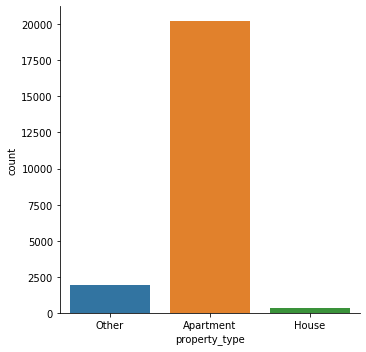

In [33]:
sns.catplot(x="property_type", kind="count", data=df);

### bathrooms, bedrooms and beds

In [34]:
for col in ['bathrooms', 'bedrooms', 'beds']:
    print("Null values:", df[col].isna().sum())

Null values: 32
Null values: 18
Null values: 40


In [35]:
#only very few missing values for each category so will replace these with median
for col in ['bathrooms','bedrooms','beds']:
    df[col].fillna(df[col].median(), inplace=True)

### bed_type

In [36]:
#There are a couple of different categories, although Real Bed dominates the category -> will keep this column
#However, may be dropped later if feature is insignificant
df.bed_type.value_counts()

Real Bed         21742
Pull-out Sofa      450
Futon              239
Couch               72
Airbed              23
Name: bed_type, dtype: int64

### amenities

Each apartment has its own amenties list, therefore we need to create an overall list with all possible amenities. Below you can see an example.

In [37]:
df.amenities[:1].values

array(['{TV,"Cable TV",Wifi,Kitchen,Gym,Heating,"Family/kid friendly","Smoke detector",Essentials,Shampoo,"Lock on bedroom door",Hangers,"Hair dryer",Iron,"Laptop friendly workspace","Private living room",Bathtub,"Hot water","Bed linens","Extra pillows and blankets",Microwave,"Coffee maker",Refrigerator,Dishwasher,"Dishes and silverware","Cooking basics",Stove,"Luggage dropoff allowed","Long term stays allowed"}'],
      dtype=object)

In [38]:
# Creating a set of all possible amenities
amenities_list = list(df.amenities)
amenities_list_string = " ".join(amenities_list)
amenities_list_string = amenities_list_string.replace('{', '')
amenities_list_string = amenities_list_string.replace('}', ',')
amenities_list_string = amenities_list_string.replace('"', '')
amenities_set = [x.strip() for x in amenities_list_string.split(',')]
amenities_set = set(amenities_set)
amenities_set

{'',
 '24-hour check-in',
 'Accessible-height bed',
 'Accessible-height toilet',
 'Air conditioning',
 'Air purifier',
 'BBQ grill',
 'Baby bath',
 'Baby monitor',
 'Babysitter recommendations',
 'Bath towel',
 'Bathroom essentials',
 'Bathtub',
 'Bathtub with bath chair',
 'Beach essentials',
 'Beachfront',
 'Bed linens',
 'Bedroom comforts',
 'Body soap',
 'Breakfast',
 'Breakfast table',
 'Building staff',
 'Buzzer/wireless intercom',
 'Cable TV',
 'Carbon monoxide detector',
 'Cat(s)',
 'Ceiling hoist',
 'Changing table',
 'Children’s books and toys',
 'Children’s dinnerware',
 'Cleaning before checkout',
 'Coffee maker',
 'Convection oven',
 'Cooking basics',
 'Crib',
 'Disabled parking spot',
 'Dishes and silverware',
 'Dishwasher',
 'Dog(s)',
 'Doorman',
 'Dryer',
 'EV charger',
 'Electric profiling bed',
 'Elevator',
 'Essentials',
 'Ethernet connection',
 'Extra pillows and blankets',
 'Family/kid friendly',
 'Fire extinguisher',
 'Fireplace guards',
 'Firm mattress',
 'First 

The list above shows all the possible amenities that an Airbnb property can contain. We will combine some of these amenities since they can be very similar (e.g. Washer and Washer/Dryer). Furthermore, we complete a small search into which amenities are most valued by guests (https://bnbduck.com/airbnb-amenities-explained/) to further reduce the amount of amenities that are present. Also if there are a majority of properties do not have a certain amenity, these will also be dropped since there will be little added value in our analysis. 

We do this process because certain amenities can be very important in determining the price of an Airbnb property and therefore we should take these into account.

Below is a list of the amenities we have chosen (a slash indicates multiple categories which will be combined into a single one)

- 24-hour check-in
- Air conditioning
- BBQ grill
- Baby bath/baby monitor/Changing table/Crib/High chair/Pack ’n Play/travel crib
- Bathtub/Bathtub with bath chair
- Beachfront/Lake access/Patio or balcony/Ski-in/Ski-out/Waterfront
- Bed linens/Bedroom comforts/Extra pillows and blanket
- Body Soap/Shampoo
- Breakfast
- Cable TV/TV
- Carbon Monoxide Detector/Smoke detector
- Cats/Dogs/Other pet(s)/Pets allowed
- Children's books and toys/Children dinnerware/"Family/kid friendly"/Outlet covers/Table corner guards/Window guards
- Cleaning before checkout
- Coffee maker
- Cooking basics/Convection oven/Full kitchen/Kitchen/Mircowave/Oven/Refrigerator/Stove
- Disabled parking spot/Fixed grab bars for shower/Fixed grab bars for toilets/Flat path to front door/Roll-in shower/Shower chair/Step-free access/Wheelchair accessible/Wide clearance to bed/Wide clearance to shower/Wide doorway/Wide entryway/Wide hallway clearance
- Dishes and silverware
- Dishwasher/Dryer/Washer/Washer / Dryer
- Elevator
- Fire Extinguisher/Fireplace guards/First aid kit
- Free parking on premises/Free street parking/Paid parking off premises/Paid parking on premises
- Game Console/Netflix/Smart TV/Sound system
- Garden or backyard
- Gym
- Heating/Indoor fireplace
- Host greets you
- Hot tub/Pool
- Internet/Ethernet connection/Pocket wifi/Wifi
- Long term stays allowed
- Self check-in
- Smoking allowed
- Suitable for events

Amenities which will be removed

- Accessible-height bed
- Accessible-height toilet
- Air purifier
- Babysitter recommendations
- Bath towel
- Bathroom essentials
- Beach essentials
- Breakfast table
- Building staff
- Buzzer/Wireless intercom
- Ceiling hoist
- Doorman
- EV charger
- Electric Profiling bed
- Essentials (very vague -> although could be important depending on its definition)
- Firm mattress
- Ground floor access
- Hair dryer
- Handheld shower head
- Hangers
- Hot water
- Hot water kettle
- Iron
- Keypad
- Kitchenette
- Laptop friendly workspace
- Lock on bedroom door
- Lockbox
- Luggage dropoff allowed
- Other
- Pets live on this property
- Private bathroom/Private entrance/Private living room
- Room-darkening shades
- Safety card
- Single level home
- Smart lock
- Stair gates
- Toilet paper
- Well-lit path to entrance
- toilet
- translation missing: en.hosting_amenity_49
- translation missing: en.hosting_amenity_50

In [39]:
df.loc[df['amenities'].str.contains('24-hour check-in'), 'check_in_24h'] = 1

In [40]:
df.loc[df['amenities'].str.contains('Air conditioning'), 'air_conditioning'] = 1

In [41]:
df.loc[df['amenities'].str.contains('BBQ grill'), 'bbq'] = 1

In [42]:
df.loc[df['amenities'].str.contains('Baby bath|Baby monitor|Changing table|Crib|High chair|Pack ’n Play/travel crib'), 'baby_friendly'] = 1

In [43]:
df.loc[df['amenities'].str.contains('Bathtub|Bathtub with bath chair'), 'bathtub'] = 1

In [44]:
df.loc[df['amenities'].str.contains('Body soap|Shampoo'),'shower_necessities'] = 1

In [45]:
df.loc[df['amenities'].str.contains('Breakfast'),'breakfast'] =1

In [46]:
df.loc[df['amenities'].str.contains('Cable TV|TV'),'tv'] = 1

In [47]:
df.loc[df['amenities'].str.contains('Carbon Monoxide Detector|Smoke detector'),'smoke_detector'] = 1

In [48]:
df.loc[df['amenities'].str.contains('Cats|Dogs|Other pet(s)|Pets allowed'),'pets_allowed'] = 1

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [49]:
df.loc[df['amenities'].str.contains("Children's books and toys|Children dinnerware|Family/kid friendly|Outlet covers|Table corner guards|Window guards"),'child_friendly'] = 1

In [50]:
df.loc[df['amenities'].str.contains('Cleaning before checkout'),'clean_before_checkout'] = 1

In [51]:
df.loc[df['amenities'].str.contains('Coffee maker'),'coffee_machine'] = 1

In [52]:
df.loc[df['amenities'].str.contains('Cooking basics|Convection oven|Full kitchen|Kitchen|Mircowave|Oven|Refrigerator|Stove'),'kitchen_basics'] = 1 

In [53]:
df.loc[df['amenities'].str.contains('Disabled parking spot|Fixed grab bars for shower|Fixed grab bars for toilets|Flat path to front door|Roll-in shower|Shower chair|Step-free access|Wheelchair accessible|Wide clearance to bed|Wide clearance to shower|Wide doorway|Wide entryway|Wide hallway clearance'),'disabled_friendly'] = 1

In [54]:
df.loc[df['amenities'].str.contains('Dishes and silverware'),'tableware'] = 1

In [55]:
df.loc[df['amenities'].str.contains('Dishwasher|Dryer|Washer|Washer / Dryer'),'white_goods'] = 1

In [56]:
df.loc[df['amenities'].str.contains('Elevator'),'elevator'] = 1

In [57]:
df.loc[df['amenities'].str.contains('Fire Extinguisher|Fireplace guards|First aid kit'),'fire_protection'] = 1

In [58]:
df.loc[df['amenities'].str.contains('Free parking on premises|Free street parking|Paid parking off premises|Paid parking on premises'),'parking'] = 1

In [59]:
df.loc[df['amenities'].str.contains('Game Console|Netflix|Smart TV|Sound system'),'non_essential_electronics'] = 1

In [60]:
df.loc[df['amenities'].str.contains('Garden or backyard'),'outdoor_space'] = 1

In [61]:
df.loc[df['amenities'].str.contains('Gym'),'gym'] = 1

In [62]:
df.loc[df['amenities'].str.contains('Heating/Indoor fireplace'),'heating'] = 1

In [63]:
df.loc[df['amenities'].str.contains('Host greets you'),'host_greeting'] = 1

In [64]:
df.loc[df['amenities'].str.contains('Hot tub|Pool'),'hot_tub_or_pool'] = 1

In [65]:
df.loc[df['amenities'].str.contains('Internet/Ethernet connection/Pocket wifi/Wifi'),'internet'] = 1

In [66]:
df.loc[df['amenities'].str.contains('Long term stays allowed'),'long_term_stays'] = 1

In [67]:
df.loc[df['amenities'].str.contains('Self check-in'),'self_check_in'] = 1

In [68]:
df.loc[df['amenities'].str.contains('Smoking allowed'),'smoking_allowed'] = 1

In [69]:
df.loc[df['amenities'].str.contains('Suitable for events'),'event_suitable'] = 1

In [70]:
df.loc[df['amenities'].str.contains('Beachfront|Lake access|Patio or balcony|Ski-in/Ski-out|Waterfront'),'nature_and_views'] = 1


In [71]:
df.loc[df['amenities'].str.contains('Bed linens|Bedroom comforts|Extra pillows and blanket'),'bedroom_necessities'] = 1

In [72]:
df.loc[df['amenities'].str.contains('Bed linens|Bedroom comforts|Extra pillows and blanket'),'bedroom_necessities'] = 1

Now we have numerous different columns to summarize the amenitites offered by an Airbnb residence. However, there are still too many columns which could lead lead to the curse of dimensionality thus we further remove amenities which add relatively little information. Amenity features where either true of false category contains fewer than 10% of listings will be removed

In [73]:
print(len(df.columns))
df.iloc[:, 51:]

84


,check_in_24h,air_conditioning,bbq,baby_friendly,bathtub,shower_necessities,breakfast,tv,smoke_detector,pets_allowed,child_friendly,clean_before_checkout,coffee_machine,kitchen_basics,disabled_friendly,tableware,white_goods,elevator,fire_protection,parking,non_essential_electronics,outdoor_space,gym,heating,host_greeting,hot_tub_or_pool,internet,long_term_stays,self_check_in,smoking_allowed,event_suitable,nature_and_views,bedroom_necessities
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,1.0,NaN,1.0,NaN,1.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0
2695,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3176,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3309,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0
7071,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29856708,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
29857108,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,1.0,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
29864272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
cols_to_replace_nulls = df.iloc[:,51:].columns
df[cols_to_replace_nulls] = df[cols_to_replace_nulls].fillna(0)

In [75]:
# Produces a list of amenity features where one category (true or false) contains fewer than 10% of listings
infrequent_amenities = []
for col in df.iloc[:,50:].columns:
    if df[col].sum() < len(df)/10:
        infrequent_amenities.append(col)
print(infrequent_amenities)

# Dropping infrequent amenity features
df.drop(infrequent_amenities, axis=1, inplace=True)

# Dropping the original amenity feature
df.drop('amenities', axis=1, inplace=True)

['check_in_24h', 'air_conditioning', 'bbq', 'baby_friendly', 'bathtub', 'breakfast', 'clean_before_checkout', 'disabled_friendly', 'non_essential_electronics', 'outdoor_space', 'gym', 'heating', 'hot_tub_or_pool', 'internet', 'self_check_in', 'event_suitable']


In [76]:
df.iloc[:,50:]

,shower_necessities,tv,smoke_detector,pets_allowed,child_friendly,coffee_machine,kitchen_basics,tableware,white_goods,elevator,fire_protection,parking,host_greeting,long_term_stays,smoking_allowed,nature_and_views,bedroom_necessities
id,,,,,,,,,,,,,,,,,
2015,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2695,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3176,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3309,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
7071,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29856708,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29857108,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
29864272,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### price

We have 1688 properties with nan values for price -> these will be removed since this is our target variable
Price is in string format as it contains the currency so therefore we convert it to integer format

In [77]:
df.price = df.price.str.replace("$", "")
df.price = df.price.str.replace(",", "")
df.price = df.price.astype('float')
df.price = df.price.astype('int64')

### security_deposit

As with price we need to convert 'secuirty_deposit' to an integer
Having a missing value for the security deposit is the same as having a security deposit of $0, therefore we will replace missing values with 0

In [78]:
df.security_deposit.isna().sum()

9342

In [79]:
df.security_deposit = df.security_deposit.str.replace(",", "")
df.security_deposit.fillna(0, inplace=True)
df.security_deposit = df.security_deposit.str.replace("$", "")
df.security_deposit.fillna(0, inplace=True)
df.security_deposit = df.security_deposit.astype('float')

In [80]:
df.security_deposit = df.security_deposit.astype('int64')

### cleaning_fee

As with price we need to convert 'cleaning_fee' to an integer
Having a missing value for the cleaning fee is the same as having a cleaning fee of $0, therefore we will replace missing values with 0

In [81]:
df.cleaning_fee.isna().sum()

7133

In [82]:
df.cleaning_fee = df.cleaning_fee.str.replace(",", "")
df.cleaning_fee.fillna(0, inplace=True)
df.cleaning_fee = df.cleaning_fee.str.replace("$", "")
df.cleaning_fee.fillna(0, inplace=True)
df.cleaning_fee = df.cleaning_fee.astype('float')

In [83]:
df.cleaning_fee = df.cleaning_fee.astype('int64')

### extra_people

As with price, this will be converted to an integer.

As with price, having a missing value for extra people is functionally the same as having an extra people fee of $0, so missing values will be replaced with 0.

In [84]:
df.extra_people.isna().sum()

0

In [85]:
df.extra_people = df.extra_people.str.replace("$", "")
df.extra_people = df.extra_people.str.replace(",", "")
df.extra_people = df.extra_people.astype('float')
df.extra_people = df.extra_people.astype('int64')

### calendar_updated

There are 75 unique categories for calendar_updated, and it is not entirely clear what this feature is adding to the model (a host might update their calendar for multiple different reasons). Therefore this column will be dropped

In [86]:
print(len(df.calendar_updated.value_counts()))

75


In [87]:
df.drop('calendar_updated', axis=1, inplace=True)

### availability

There are multiple different measures of availability, which will be highly correlated with each other. Only one will be retained, availability for 365 days (availability_365). This is due to the enforcement of Berlin regulations which allows hosts to rent out their primary residence on a short term basis, however the law does not specify a limit for how many days someone can rent out their primary residence to guests. 

There is a limit of 90 days on secondary residences, but this dataset does not contian information about primary/secondary residences, therefore we will keep the 365 days column.

https://www.airbnb.ae/help/article/854/berlin?_set_bev_on_new_domain=1576339053_33tpERxPL%2F%2BFx2K%2B

In [88]:
df.drop(['availability_30', 'availability_60', 'availability_90'], axis=1, inplace=True)

### first_review and last_review

Almost 20 percent of listings have not had a review written for them. This is too large a proportion of the dataset to drop, and dropping the columns would lose a lot of useful information because reviews are very important in people's decisions to book, and therefore price.

This is also too large a proportion of the dataset to simply replace with median/mean values, as this would skew the distribution substantially. Also, the missing values here are not really missing values, as the fact that they are NaNs is meaningful - it tells us that these are new or previously unbooked listings that have not had reviews yet. In order to make the resulting model work able to predict prices for any Airbnb listing, including brand new listings, is is actually beneficial to keep them in. Therefore, these will be kept as an unknown category, and the feature will have to be treated as categorical (and therefore one-hot encoded) rather than numerical.

In [89]:
print(f"Null values in 'first_review': {round(100*df.first_review.isna().sum()/len(df),1)}%")
print(f"Null values in 'review_scores_rating': {round(100*df.review_scores_rating .isna().sum()/len(df),1)}%")

Null values in 'first_review': 17.3%
Null values in 'review_scores_rating': 19.4%


In [90]:
df.first_review = pd.to_datetime(df.first_review)

# Calculating the number of days between the first review and the date the data was scraped
df['time_since_first_review'] = (pd.datetime(2019, 4, 9) - df.first_review).astype('timedelta64[D]')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  after removing the cwd from sys.path.


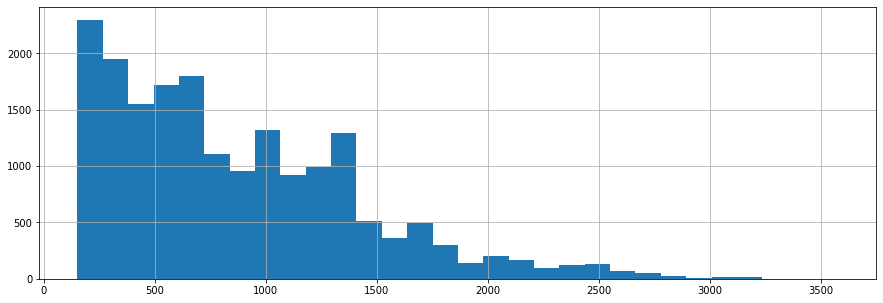

In [91]:
# Distribution of the number of days since first review
df.time_since_first_review.hist(figsize=(15,5), bins=30);

In [92]:
def bin_column(col, bins, labels, na_label='unknown'):
    """
    Takes in a column name, bin cut points and labels, replaces the original column with a
    binned version, and replaces nulls (with 'unknown' if unspecified).
    """
    df[col] = pd.cut(df[col], bins=bins, labels=labels, include_lowest=True)
    df[col] = df[col].astype('str')
    df[col].fillna(na_label, inplace=True)

In [93]:
# Binning time since first review
bin_column('time_since_first_review',
           bins=[0, 182, 365, 730, 1460, max(df.time_since_first_review)],
           labels=['0-6 months',
                   '6-12 months',
                   '1-2 years',
                   '2-3 years',
                   '4+ years'],
           na_label='no reviews')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


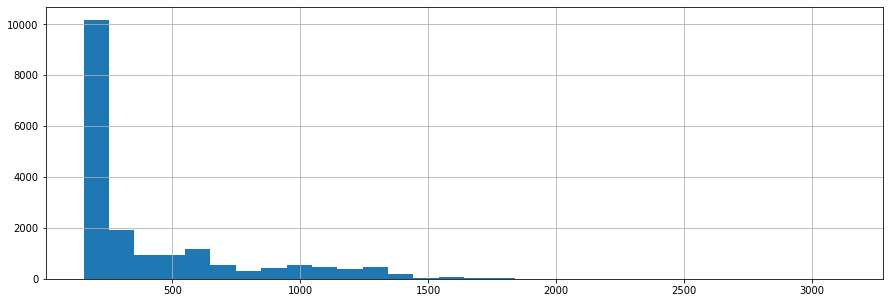

In [94]:
#Same process for last_review

df.last_review = pd.to_datetime(df.last_review) # Converting to datetime

# Calculating the number of days between the most recent review and the date the data was scraped
df['time_since_last_review'] = (pd.datetime(2019, 4, 9) - df.last_review).astype('timedelta64[D]')

# Distribution of the number of days since last review
df.time_since_last_review.hist(figsize=(15,5), bins=30);

In [95]:
# Binning time since last review
bin_column('time_since_last_review',
           bins=[0, 14, 60, 182, 365, max(df.time_since_last_review)],
           labels=['0-2 weeks',
                   '2-8 weeks',
                   '2-6 months',
                   '6-12 months',
                   '1+ year'],
           na_label='no reviews')

In [96]:
# Dropping last_review - first_review will be kept for EDA and dropped later
df.drop('last_review', axis=1, inplace=True)

### review ratings columns

As above, listings without reviews will be kept and replaced with unknown. Other ratings will be grouped into bins. The histograms below were produced in order to decide on useful bins. The majority of ratings are 9 or 10 out of 10, as also seen in the value count below. Therefore for these columns, 9/10 and 10/10 will be kept as separate groups, and 1-8/10 will be binned together (as this is, by Airbnb standards, a 'low' rating).

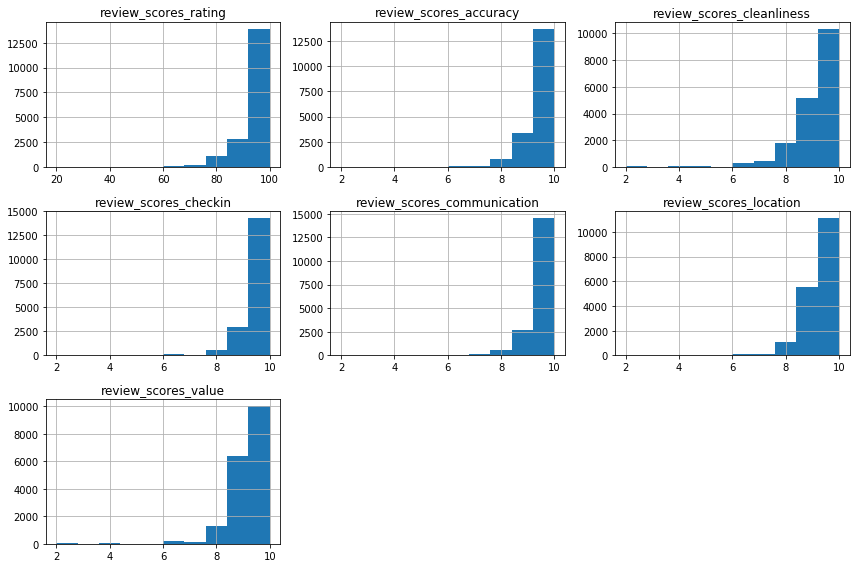

In [97]:
# Checking the distributions of the review ratings columns
variables_to_plot = list(df.columns[df.columns.str.startswith("review_scores") == True])
fig = plt.figure(figsize=(12,8))
for i, var_name in enumerate(variables_to_plot):
    ax = fig.add_subplot(3,3,i+1)
    df[var_name].hist(bins=10,ax=ax)
    ax.set_title(var_name)
fig.tight_layout()
plt.show()

In [98]:
# Creating a list of all review columns that are scored out of 10
variables_to_plot.pop(0)

'review_scores_rating'

In [99]:
# Binning for all columns scored out of 10
for col in variables_to_plot:
    bin_column(col,
               bins=[0, 8, 9, 10],
               labels=['0-8/10', '9/10', '10/10'],
               na_label='no reviews')

In [100]:
# Binning column scored out of 100
bin_column('review_scores_rating',
           bins=[0, 80, 95, 100],
           labels=['0-79/100', '80-94/100', '95-100/100'],
           na_label='no reviews')

### cancellation_policy

The cancellation policy column must be cleaned as types is required, in order to categorise the four very small categories into the three larger categories (e.g. the super strict options are only available to long-term Airbnb hosts, and is invitation only).

In [101]:
df.cancellation_policy.value_counts()

flexible                       9083
moderate                       7092
strict_14_with_grace_period    6284
super_strict_30                  53
super_strict_60                  14
Name: cancellation_policy, dtype: int64

In [102]:
# Replacing categories
df.cancellation_policy.replace({
    'super_strict_30': 'strict_14_with_grace_period',
    'super_strict_60': 'strict_14_with_grace_period',
    'strict': 'strict_14_with_grace_period',
    'luxury_moderate': 'moderate'
    }, inplace=True)

In [103]:
df.cancellation_policy.value_counts()

flexible                       9083
moderate                       7092
strict_14_with_grace_period    6351
Name: cancellation_policy, dtype: int64

###  reviews_per_month

These will be highly correlated with number_of_reviews and so will be dropped.



In [104]:
df.drop(['reviews_per_month'], axis=1, inplace=True)

In [105]:
df.head()
df.dtypes

host_since                 datetime64[ns]
host_response_time                 object
host_response_rate                 object
host_is_superhost                 float64
host_listings_count               float64
                                ...      
smoking_allowed                   float64
nature_and_views                  float64
bedroom_necessities               float64
time_since_first_review            object
time_since_last_review             object
Length: 63, dtype: object

In [106]:
df.isna().sum()

host_since                 0
host_response_time         0
host_response_rate         0
host_is_superhost          0
host_listings_count        0
                          ..
smoking_allowed            0
nature_and_views           0
bedroom_necessities        0
time_since_first_review    0
time_since_last_review     0
Length: 63, dtype: int64

# Occupancy
Now, let's look at the occupancy rate of Airbnb listings.


The occupancy of an apartment is defined by two things: the duration and the number of bookings. We assume that the a booking's duration is equal to the minimum number of nights per booking on average then "minimum_nights" is the column to use as proxy for duration. Also, we assume that most of the people who booked an apartment left a review, we can use the column "number_of_reveiws" as a proxy for the number of bookings. However, we are going to cap the number of reviews per month based on the maximum number of bookings per month. This maximum does not only depend on the booking duration and number of bookings, but also on the maximum number of days a booking is available for bookings. As many listings have a future availability of 0 days - maybe because they are already fully booked - we assume they can in general be booked for a full months i.e. 30.42 days

In [107]:
print(len(df.columns))

63


In [108]:
# Define adjusted proxy for number of bookings per months
df["max_bookings_per_month"] = (30.42 / df["minimum_nights"]).fillna(0)
df["bookings_per_month"] = df[["max_bookings_per_month","number_of_reviews"]].min(axis=1)
df = df.drop("max_bookings_per_month", axis=1)

df["bookings_per_month"].describe()

count    22526.000000
mean         6.393423
std          7.353029
min          0.000000
25%          1.000000
50%          4.000000
75%         10.140000
max         30.420000
Name: bookings_per_month, dtype: float64

In [109]:
# Calculate the monthly occupancy rate for each listing
df["occupancy_rate"] = (df["bookings_per_month"] * df["minimum_nights"] / 30.42).fillna(0)
df["occupancy_rate"].describe()

count    22526.000000
mean         0.506756
std          0.412492
min          0.000000
25%          0.098619
50%          0.427350
75%          1.000000
max          1.000000
Name: occupancy_rate, dtype: float64

In [110]:
print(len(df.columns))

65


# Calendar summary cleaning

In [111]:
df_cs = pd.read_csv('calendar_summary.csv')
print(f"The dataset contains {len(df_cs)} calendar checkpoints")
pd.set_option('display.max_columns', len(df.columns)) # To view all columns
df_cs.head(10)

# Dataset shows whether property was available on given day + if yes, price of it on each day

The dataset contains 8231480 calendar checkpoints


,listing_id,date,available,price
0,2015,2019-09-10,f,NaN
1,2015,2019-09-09,f,NaN
2,2015,2019-09-08,f,NaN
3,2015,2019-09-07,f,NaN
4,2015,2019-09-06,f,NaN
5,2015,2019-09-05,f,NaN
6,2015,2019-09-04,f,NaN
7,2015,2019-09-03,f,NaN
8,2015,2019-09-02,f,NaN
9,2015,2019-09-01,f,NaN


In [112]:
df_cs.isna().sum()

# 6.4M NaN in price means that 6.4M out of 8.2M times listing was not available (either rented or not listed by host)

listing_id          0
date                0
available           0
price         6430639
dtype: int64

In [113]:
df_cs['date'].values
df_cs['listing_id'].value_counts()

# considered period: 7/11/18 - 6/11/19 (also checked in Excel to confirm dates)

29603721    365
13585558    365
15801211    365
16235439    365
27244206    365
           ... 
7890338     365
17263170    365
29516515    365
25693102    365
21838247    365
Name: listing_id, Length: 22552, dtype: int64

In [114]:
# What we can get from calendar_summary dataset: pct of dates where each listing was not-available -- occupancy rate
# Assuming it means that it was rented, NOT that host delisted it for some reason, we get a proxy of how popular listing is

# Change available t/f to 1/0
df_cs['available'] = df_cs.available.map(lambda x: 1 if x == 't' else 0)

In [115]:
# Make DataTable: sum of available days by listing
occupancy = pd.DataFrame(df_cs.groupby('listing_id')['available'].sum())

# Change to pct
occupancy['available'] = occupancy['available'].div(365)

# Change availability to occupancy
occupancy['occupancy'] = 1 - occupancy['available']

# Remove available column
occupancy.drop('available',axis=1,inplace=True)

In [116]:
# Let's also take av price of available listings to understand how they differ from price from listings_cleaned

# First, get rid of $$$ sign in price
df_cs['price'] = df_cs['price'].str.replace('$','')
#calendar['price'] = calendar['price'].str.replace('$', '').str.replace(',', '')

# Then, change price from object to float
df_cs['price'] = pd.to_numeric(df_cs['price'],errors='coerce')

# Now, take av_price per listing
av_price = pd.DataFrame(df_cs.groupby('listing_id')['price'].mean())
av_price.head()

# Let's also do the same with median price (to even out extreme cases like NY Eve's)
med_price = pd.DataFrame(df_cs.groupby('listing_id')['price'].median())
med_price.head()

,price
listing_id,
2015,76.0
2695,NaN
3176,90.0
3309,26.0
7071,44.0


In [117]:
# Now, let merge new found data into listings_cleaned

df.rename(columns={'id':'listing_id'})
occupancy.index

Int64Index([    2015,     2695,     3176,     3309,     7071,     9991,
               14325,    16401,    16644,    17409,
            ...
            29851651, 29853463, 29856029, 29856359, 29856646, 29856708,
            29857108, 29864272, 29866805, 29867352],
           dtype='int64', name='listing_id', length=22552)

In [118]:
linked = pd.merge(df,occupancy,left_index = True,right_index = True)
linked = pd.merge(linked,av_price,left_index = True,right_index = True)
linked = pd.merge(linked,med_price,left_index = True,right_index = True)
linked.rename(columns={'price_y':'av_price_last_year','occupancy':'occupancy_last_year','price':'med_price_last_year','price_x':'price',},inplace=True)
linked.head()

,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_365,number_of_reviews,first_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,...,description_length,neighborhood_overview_length,host_verifications_count,FB_verification,email_verification,ID_verification,phone_verification,host_days_active,shower_necessities,tv,smoke_detector,pets_allowed,child_friendly,coffee_machine,kitchen_basics,tableware,white_goods,elevator,fire_protection,parking,host_greeting,long_term_stays,smoking_allowed,nature_and_views,bedroom_necessities,time_since_first_review,time_since_last_review,bookings_per_month,occupancy_rate,occupancy_last_year,av_price_last_year,med_price_last_year
2015,2008-08-18,within an hour,90-99%,1.0,4.0,1.0,Brunnenstr. Süd,Mitte,Other,Entire home/apt,3,1.0,1.0,2.0,Real Bed,60,200,30,1,28,4,1125,141,118,2016-04-11,80-94/100,10/10,9/10,10/10,10/10,10/10,9/10,...,1000.0,423.0,5,0,1,2,1,3989.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2-3 years,2-6 months,7.605000,1.000000,0.613699,81.900709,76.0
2695,2008-09-16,unknown,unknown,0.0,1.0,1.0,Prenzlauer Berg Nordwest,Pankow,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,17,0,0,1,0,2,40,0,6,2018-07-04,95-100/100,10/10,10/10,10/10,10/10,10/10,10/10,...,1000.0,0.0,4,0,1,1,1,3960.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6-12 months,6-12 months,6.000000,0.394477,1.000000,NaN,NaN
3176,2008-10-19,within a day,100%,0.0,1.0,1.0,Prenzlauer Berg Südwest,Pankow,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,90,200,50,2,20,62,1125,220,143,2009-06-20,80-94/100,9/10,9/10,9/10,9/10,10/10,9/10,...,1000.0,476.0,6,1,1,1,1,3927.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4+ years,1+ year,0.490645,1.000000,0.397260,90.000000,90.0
3309,2008-11-07,unknown,unknown,0.0,1.0,1.0,Schöneberg-Nord,Tempelhof - Schöneberg,Apartment,Private room,2,1.0,1.0,1.0,Pull-out Sofa,26,250,30,1,18,5,360,297,25,2013-08-12,80-94/100,9/10,9/10,9/10,10/10,9/10,9/10,...,1000.0,315.0,5,0,2,1,1,3908.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,4+ years,6-12 months,6.084000,1.000000,0.186301,27.131313,26.0
7071,2009-05-16,within an hour,100%,1.0,1.0,1.0,Helmholtzplatz,Pankow,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,42,0,0,1,24,2,10,26,197,2009-08-18,95-100/100,10/10,10/10,10/10,10/10,10/10,9/10,...,1000.0,411.0,4,0,1,1,1,3718.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4+ years,2-6 months,15.210000,1.000000,0.928767,44.384615,44.0


In [119]:
linked['price'].describe()

count    22526.000000
mean        66.771020
std        212.201084
min          0.000000
25%         30.000000
50%         45.000000
75%         70.000000
max       8600.000000
Name: price, dtype: float64

In [120]:
print(len(df.columns))

65


In [130]:
# Save cleaned dataset
listings_cleaned = linked.to_csv('listings_cleaned.csv', index=id, header=True)